In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task2-datasett/automobile_data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt


from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [3]:
df1=pd.read_csv("/kaggle/input/task2-datasett/automobile_data.csv")
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [592]:
df1.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [169]:
df_c = df1.copy()
df_c = df_c.drop_duplicates()
print("Before dropping duplicates {} after dropping duplicates {}".format(df1.shape[0], df_c.shape[0]))

Before dropping duplicates 205 after dropping duplicates 205


clearly no duplicates

In [4]:
df1['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# EDA and DATA  VISUALIZATION

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df1.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Handling '?' in dataset by replacing them with nan so we can impute them later

In [7]:
input_df=df1.drop(['price','symboling'],axis=1)
target_df=df1['price']
input_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30
4,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,six,145,idi,3.01,3.4,23.0,106,4800,26,27


In [591]:
df1.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
marks = input_df.columns[input_df.isin(['?']).any()]
marks

Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm'],
      dtype='object')

In [9]:
input_df.replace('?', np.nan, inplace=True)
target_df.replace('?',np.nan,inplace=True)
input_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30
4,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,six,145,idi,3.01,3.4,23.0,106,4800,26,27


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [11]:
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


converting some columns from object to float for preprocessing

In [459]:
input_df[['normalized-losses','num-of-doors','bore', 'stroke', 'horsepower',
       'peak-rpm']].astype(float)

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm
0,122.0,2.0,3.47,2.68,111.0,5000.0
1,122.0,2.0,3.47,2.68,111.0,5000.0
2,122.0,2.0,2.68,3.47,154.0,5000.0
3,164.0,4.0,3.19,3.40,102.0,5500.0
4,164.0,4.0,3.19,3.40,115.0,5500.0
...,...,...,...,...,...,...
200,95.0,4.0,3.78,3.15,114.0,5400.0
201,95.0,4.0,3.78,3.15,160.0,5300.0
202,95.0,4.0,3.58,2.87,134.0,5500.0
203,95.0,4.0,3.01,3.40,106.0,4800.0


In [12]:
df1['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [461]:
numerical_columns = input_df.select_dtypes(include=['float64', 'int64']).columns

categorical_columns=input_df.loc[:,['make','fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']]
# Create DataFrame for numerical and categorical columns
df_numerical = input_df[numerical_columns]


numerical_columns


Index(['normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')

In [14]:
categorical_columns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make             205 non-null    object
 1   fuel-type        205 non-null    object
 2   aspiration       205 non-null    object
 3   body-style       205 non-null    object
 4   drive-wheels     205 non-null    object
 5   engine-location  205 non-null    object
 6   engine-type      205 non-null    object
 7   fuel-system      205 non-null    object
dtypes: object(8)
memory usage: 12.9+ KB


splitting the columns into input data cols and the target cols which well predict

Scaling all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].

In [583]:
t1=target_df.array.reshape(-1,1)


In [462]:
scaler = MinMaxScaler().fit(input_df[numerical_columns])
input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])
input_df[numerical_columns]


,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.298429,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
1,0.298429,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
2,0.298429,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158
3,0.518325,1.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421
4,0.518325,1.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,1.0,0.655977,0.711940,0.716667,0.641667,0.567882,0.2,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789
201,0.157068,1.0,0.655977,0.711940,0.708333,0.641667,0.605508,0.2,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842
202,0.157068,1.0,0.655977,0.711940,0.716667,0.641667,0.591156,0.4,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211
203,0.157068,1.0,0.655977,0.711940,0.716667,0.641667,0.670675,0.4,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474


In [463]:
imputer = SimpleImputer(strategy='mean').fit(input_df[['normalized-losses','num-of-doors','bore', 'stroke', 'horsepower',
       'peak-rpm']])
input_df[['normalized-losses','num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm']] = imputer.transform(input_df[['normalized-losses','num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm']])
imputer1=SimpleImputer(strategy='mean').fit(t1)
t1=imputer1.transform(pd.DataFrame(t1))

Categorical encoding

In [464]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [465]:
input_df['num-of-doors'].replace({'two':2, 'four':4}, inplace=True)
input_df['num-of-cylinders'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}, inplace=True)

In [466]:
input_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.298429,alfa-romero,gas,std,0.0,convertible,rwd,front,0.058309,0.413433,...,0.2,0.260377,mpfi,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
1,0.298429,alfa-romero,gas,std,0.0,convertible,rwd,front,0.058309,0.413433,...,0.2,0.260377,mpfi,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
2,0.298429,alfa-romero,gas,std,0.0,hatchback,rwd,front,0.230321,0.449254,...,0.4,0.343396,mpfi,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158
3,0.518325,audi,gas,std,1.0,sedan,fwd,front,0.384840,0.529851,...,0.2,0.181132,mpfi,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421
4,0.518325,audi,gas,std,1.0,sedan,4wd,front,0.373178,0.529851,...,0.3,0.283019,mpfi,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,volvo,gas,std,1.0,sedan,rwd,front,0.655977,0.711940,...,0.2,0.301887,mpfi,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789
201,0.157068,volvo,gas,turbo,1.0,sedan,rwd,front,0.655977,0.711940,...,0.2,0.301887,mpfi,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842
202,0.157068,volvo,gas,std,1.0,sedan,rwd,front,0.655977,0.711940,...,0.4,0.422642,mpfi,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211
203,0.157068,volvo,diesel,turbo,1.0,sedan,rwd,front,0.655977,0.711940,...,0.4,0.316981,idi,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474


In [585]:
df_encoded = pd.get_dummies(input_df, columns=['make','fuel-type', 'aspiration', 'body-style', 
                                         'drive-wheels', 'engine-location', 'engine-type', 
                                         'fuel-system'])

# Display the first few rows of the encoded dataframe
df_encoded = df_encoded.astype(float)
df_encoded.head(7)



,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0.298429,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.298429,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.298429,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.4,0.343396,0.100000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.518325,1.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.2,0.181132,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.518325,1.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.3,0.283019,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.298429,0.0,0.384840,0.540299,0.500000,0.441667,0.395268,0.3,0.283019,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.486911,1.0,0.559767,0.770149,0.925000,0.658333,0.525989,0.3,0.283019,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [468]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   normalized-losses       205 non-null    float64
 1   num-of-doors            205 non-null    float64
 2   wheel-base              205 non-null    float64
 3   length                  205 non-null    float64
 4   width                   205 non-null    float64
 5   height                  205 non-null    float64
 6   curb-weight             205 non-null    float64
 7   num-of-cylinders        205 non-null    float64
 8   engine-size             205 non-null    float64
 9   bore                    205 non-null    float64
 10  stroke                  205 non-null    float64
 11  compression-ratio       205 non-null    float64
 12  horsepower              205 non-null    float64
 13  peak-rpm                205 non-null    float64
 14  city-mpg                205 non-null    fl

In [469]:
input_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.298429,alfa-romero,gas,std,0.0,convertible,rwd,front,0.058309,0.413433,...,0.2,0.260377,mpfi,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
1,0.298429,alfa-romero,gas,std,0.0,convertible,rwd,front,0.058309,0.413433,...,0.2,0.260377,mpfi,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
2,0.298429,alfa-romero,gas,std,0.0,hatchback,rwd,front,0.230321,0.449254,...,0.4,0.343396,mpfi,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158
3,0.518325,audi,gas,std,1.0,sedan,fwd,front,0.384840,0.529851,...,0.2,0.181132,mpfi,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421
4,0.518325,audi,gas,std,1.0,sedan,4wd,front,0.373178,0.529851,...,0.3,0.283019,mpfi,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,volvo,gas,std,1.0,sedan,rwd,front,0.655977,0.711940,...,0.2,0.301887,mpfi,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789
201,0.157068,volvo,gas,turbo,1.0,sedan,rwd,front,0.655977,0.711940,...,0.2,0.301887,mpfi,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842
202,0.157068,volvo,gas,std,1.0,sedan,rwd,front,0.655977,0.711940,...,0.4,0.422642,mpfi,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211
203,0.157068,volvo,diesel,turbo,1.0,sedan,rwd,front,0.655977,0.711940,...,0.4,0.316981,idi,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474


<Axes: >

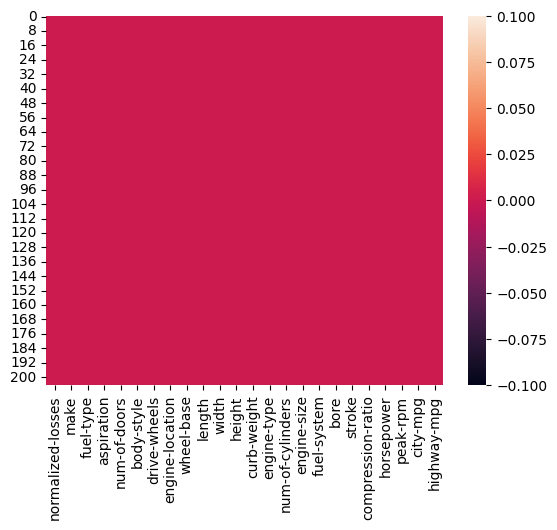

In [470]:
sns.heatmap(input_df.isnull())

In [471]:
input_df.isnull().sum()

normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

no missing values

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>],
       [<Axes: title={'center': 'engine-size'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'city-mpg'}>],
       [<Axes: title={'center': 'highway-mpg'}>, <Axes: >, <Axes: >]],
      dtype=object)

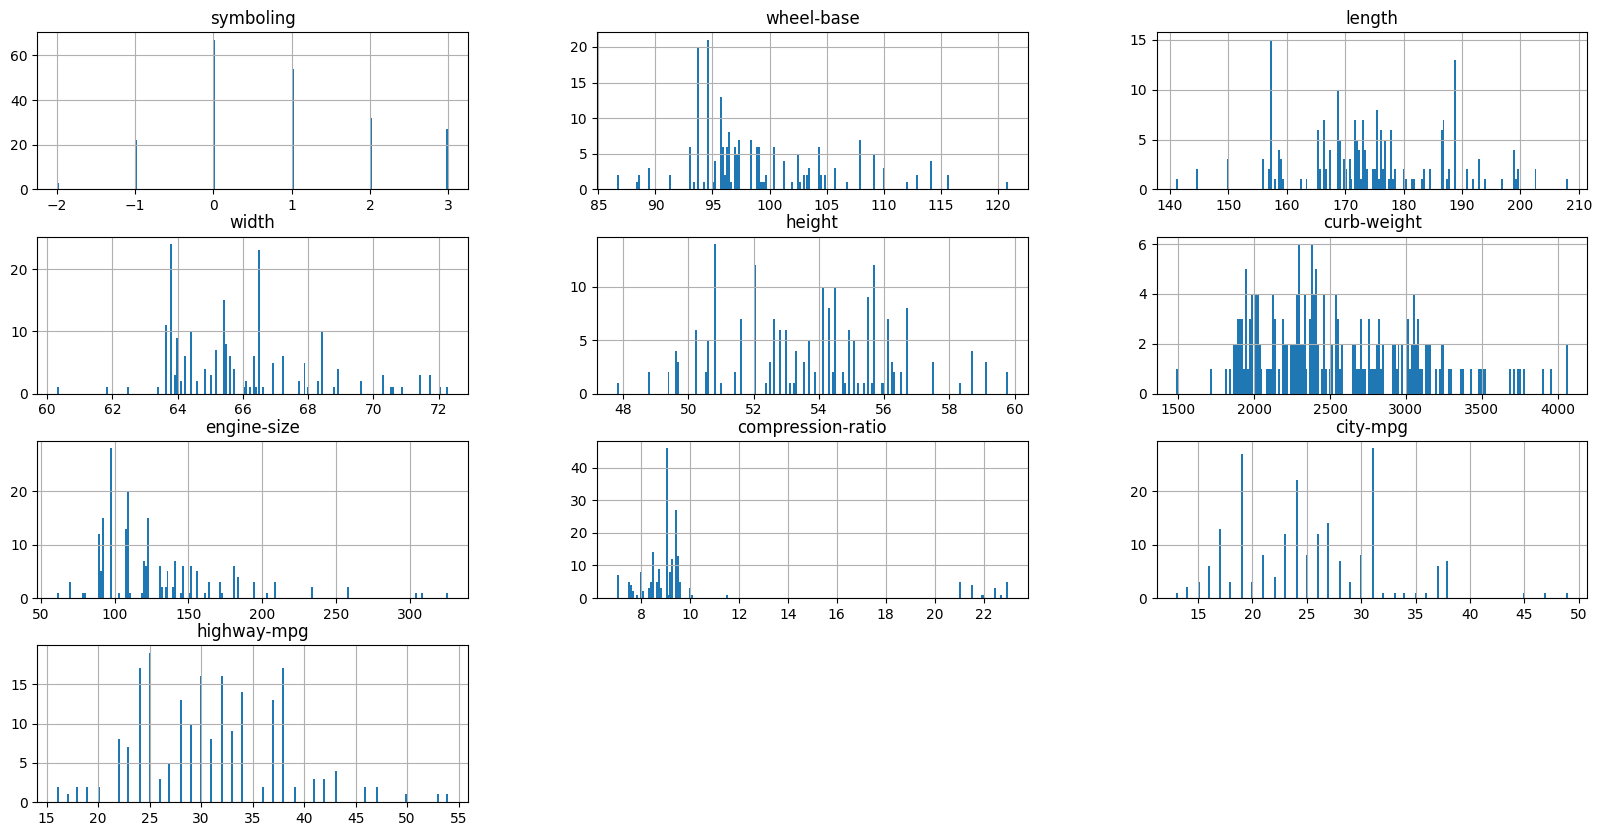

In [472]:
df1.hist(bins=200,figsize=[20,10])

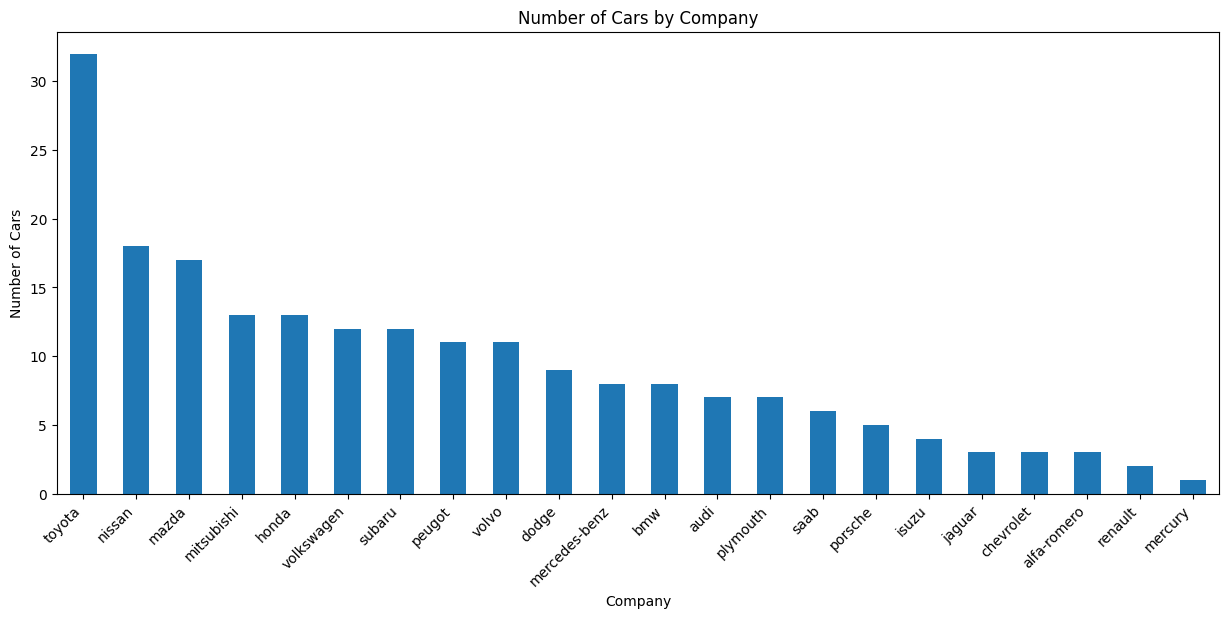

In [473]:

plt.figure(figsize=(15, 6))

# making bar plot of value count of cars by company
df1['make'].value_counts().plot(kind='bar')
# adding title and x and y axis labels
plt.title('Number of Cars by Company')
plt.xlabel('Company')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.show()

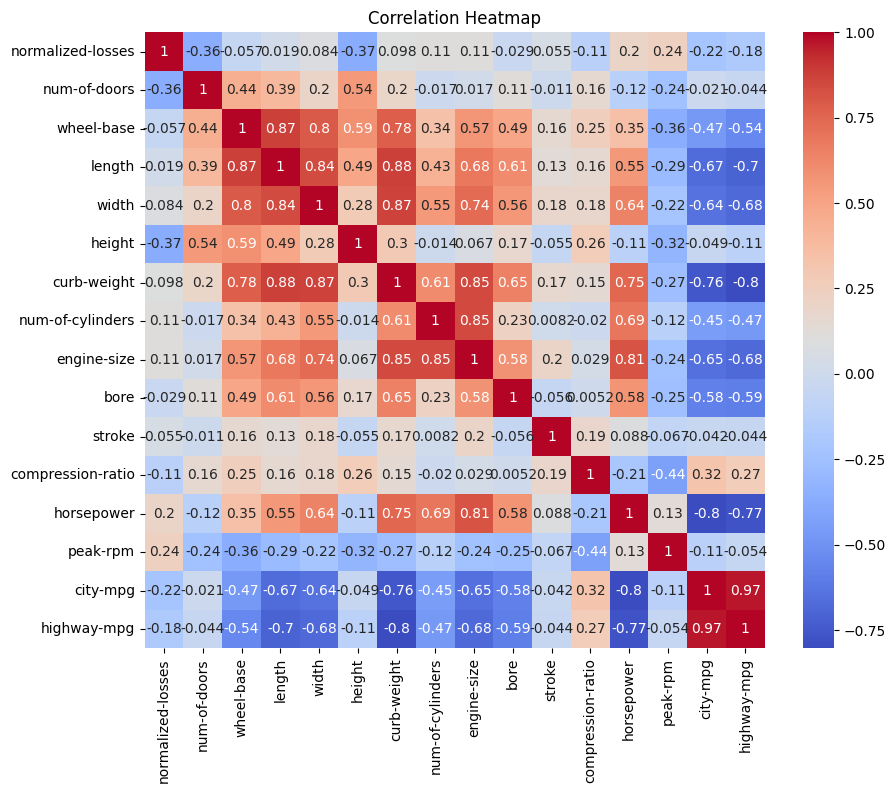

In [474]:
correlation_matrix = input_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Principal Component Analysis

it uses linear projections of data to reduce their dimensions,while attempting to maximize the variance of data in the projection

For example, one could have an n-dimensional dataset, having n features, and reduce the dataset all the way down to 1-dimension by creating a feature consisting of just the first principal component. However, when it comes to making predictions one still need access to all of the original features so as to re-create the same principal component(s) to feed into the trained model. So, although PCA reduces the number of dimensions, it is not to be considered a feature elimination technique. It should be mentioned that PCA has notable limitations; the feature-mixtures in the components created by PCA become uninterpretable

In [475]:
input_df[['normalized-losses','bore', 'stroke', 'horsepower',
       'peak-rpm']].shape

(205, 5)

In [476]:
input_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.298429,alfa-romero,gas,std,0.0,convertible,rwd,front,0.058309,0.413433,...,0.2,0.260377,mpfi,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
1,0.298429,alfa-romero,gas,std,0.0,convertible,rwd,front,0.058309,0.413433,...,0.2,0.260377,mpfi,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
2,0.298429,alfa-romero,gas,std,0.0,hatchback,rwd,front,0.230321,0.449254,...,0.4,0.343396,mpfi,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158
3,0.518325,audi,gas,std,1.0,sedan,fwd,front,0.384840,0.529851,...,0.2,0.181132,mpfi,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421
4,0.518325,audi,gas,std,1.0,sedan,4wd,front,0.373178,0.529851,...,0.3,0.283019,mpfi,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,volvo,gas,std,1.0,sedan,rwd,front,0.655977,0.711940,...,0.2,0.301887,mpfi,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789
201,0.157068,volvo,gas,turbo,1.0,sedan,rwd,front,0.655977,0.711940,...,0.2,0.301887,mpfi,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842
202,0.157068,volvo,gas,std,1.0,sedan,rwd,front,0.655977,0.711940,...,0.4,0.422642,mpfi,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211
203,0.157068,volvo,diesel,turbo,1.0,sedan,rwd,front,0.655977,0.711940,...,0.4,0.316981,idi,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474


In [477]:
df_encoded

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0.298429,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.298429,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.298429,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.4,0.343396,0.100000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.518325,1.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.2,0.181132,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.518325,1.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.3,0.283019,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,1.0,0.655977,0.711940,0.716667,0.641667,0.567882,0.2,0.301887,0.885714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.157068,1.0,0.655977,0.711940,0.708333,0.641667,0.605508,0.2,0.301887,0.885714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.157068,1.0,0.655977,0.711940,0.716667,0.641667,0.591156,0.4,0.422642,0.742857,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.157068,1.0,0.655977,0.711940,0.716667,0.641667,0.670675,0.4,0.316981,0.335714,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [568]:
pca = PCA(n_components=29)
x_reduced = pca.fit_transform(df_encoded)

In [569]:
print("Number of original features is {} and of reduced features is {}".format(df_encoded.shape[1], x_reduced.shape[1]))

Number of original features is 67 and of reduced features is 29


# Train-Test split and model training

In [570]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(df_encoded, t1, test_size=0.25, random_state=42,shuffle=True)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_reduced,t1, test_size=0.25, random_state=42,shuffle=True)

In [571]:
X_train_clean

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
90,0.329843,0.0,0.230321,0.361194,0.291667,0.558333,0.205198,0.2,0.158491,0.321429,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
173,0.000000,1.0,0.460641,0.514925,0.516667,0.591667,0.325058,0.2,0.230189,0.550000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
93,0.198953,1.0,0.230321,0.434328,0.291667,0.475000,0.207913,0.2,0.135849,0.435714,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.298429,0.0,0.384840,0.540299,0.500000,0.441667,0.395268,0.3,0.283019,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
167,0.361257,0.0,0.344023,0.523881,0.441667,0.350000,0.408068,0.2,0.320755,0.771429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.869110,0.0,0.367347,0.558209,0.633333,0.158333,0.640419,0.4,0.452830,0.635714,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14,0.298429,1.0,0.492711,0.714925,0.550000,0.658333,0.607836,0.4,0.388679,0.550000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
92,0.298429,1.0,0.230321,0.361194,0.291667,0.558333,0.174554,0.2,0.135849,0.435714,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
179,0.691099,0.0,0.475219,0.632836,0.616667,0.350000,0.592708,0.4,0.415094,0.521429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# modeling

In [572]:
clean_eval=dict()
reduced_eval=dict()
def evaluate_regression(evals, model, name, X_train, X_test, y_train, y_test):
    train_MSE = mean_squared_error(y_train, model.predict(X_train), squared=False)
    test_MSE = mean_squared_error(y_test, model.predict(X_test), squared=False)
    train_MAE=mean_absolute_error(y_train,model.predict(X_train))
    test_MAE=mean_absolute_error(y_test, model.predict(X_test))
    r2_train = r2_score(y_train, model.predict(X_train))
    r2_test = r2_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_MSE, test_MSE,train_MAE,test_MAE, r2_train, r2_test]
    print(" train MSE " + str(name) + " {}  Test MSE ".format(train_MSE) + str(name) + " {}".format(test_MSE))
    print(" train MAE " + str(name) + " {}  Test MAE ".format(train_MAE) + str(name) + " {}".format(test_MAE))
    print("R2 score for " + str(name) + " training is {} ".format(r2_train*100) + " and for test is {}".format(r2_test*100))

In [573]:
model1=LinearRegression().fit(X_train_r,y_train_r)
evaluate_regression(reduced_eval,model1,'linear reg',X_train_r, X_test_r, y_train_r, y_test_r)


 train MSE linear reg 2493.6491516623446  Test MSE linear reg 3400.895341560435
 train MAE linear reg 1631.3730406864481  Test MAE linear reg 2410.105745473904
R2 score for linear reg training is 89.602404798886  and for test is 82.70789686217505


In [574]:
rlr = Ridge(alpha=0.9).fit(X_train_r, y_train_r)
evaluate_regression(reduced_eval,rlr, "Ridge Regression", X_train_r, X_test_r, y_train_r, y_test_r)

 train MSE Ridge Regression 2528.1061904367534  Test MSE Ridge Regression 3354.390596985231
 train MAE Ridge Regression 1683.0281426563545  Test MAE Ridge Regression 2298.4187157963033
R2 score for Ridge Regression training is 89.31307330587317  and for test is 83.1775770950365


In [575]:
rlr_cleaned=Ridge(alpha=0.9).fit(X_train_clean,y_train_clean)
evaluate_regression(clean_eval,rlr_cleaned, "Ridge Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

 train MSE Ridge Regression 1708.5705719256825  Test MSE Ridge Regression 3213.20332035429
 train MAE Ridge Regression 1164.8601167646052  Test MAE Ridge Regression 2084.8415897321456
R2 score for Ridge Regression training is 95.11878373171939  and for test is 84.56389596860684


In [576]:
reduced_las = LinearRegression().fit(X_train_r, y_train_r)
evaluate_regression(reduced_eval,reduced_las, "Reduced Lasso Regression", X_train_r, X_test_r, y_train_r, y_test_r)

 train MSE Reduced Lasso Regression 2493.6491516623446  Test MSE Reduced Lasso Regression 3400.895341560435
 train MAE Reduced Lasso Regression 1631.3730406864481  Test MAE Reduced Lasso Regression 2410.105745473904
R2 score for Reduced Lasso Regression training is 89.602404798886  and for test is 82.70789686217505


In [577]:
from sklearn.ensemble import RandomForestRegressor
r3=RandomForestRegressor(n_estimators=400).fit(X_train_r,y_train_r)


In [578]:
evaluate_regression(clean_eval,r3,'RandomForest',X_train_r, X_test_r, y_train_r, y_test_r)

 train MSE RandomForest 1308.2919140202018  Test MSE RandomForest 3650.337869207113
 train MAE RandomForest 894.2326855393896  Test MAE RandomForest 2192.918255597015
R2 score for RandomForest training is 97.13798753655949  and for test is 80.07825345478275


In [580]:
def plot_predictionss(model, X_test, y_test):
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual Values')
    plt.legend()
    
    # Display the plot
    plt.show()


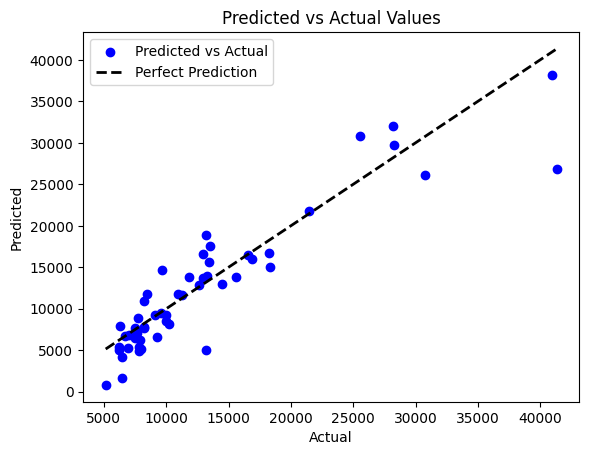

In [582]:
plot_predictionss(rlr,X_test_r,y_test_r)

In [587]:
import joblib
with open('rlr.pkl', 'wb') as model_file:
    joblib.dump(rlr, model_file)

with open('pca.pkl', 'wb') as pca_file:
    joblib.dump(pca, pca_file)
    
joblib.dump(scaler, 'scaler.pkl')
dummies_columns = df_encoded.columns
joblib.dump(dummies_columns, 'dummies_columns.pkl')

['dummies_columns.pkl']

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your trained model, PCA transformer, scaler, and column names for dummies
model = joblib.load('model.pkl')  # Update path to your saved model
pca = joblib.load('pca_transformer.pkl')  # Update path to your saved PCA transformer
scaler = joblib.load('scaler.pkl')  # Update path to your saved scaler
dummies_columns = joblib.load('dummies_columns.pkl')  # Update path to your saved dummies columns

# Define preprocessing function
def preprocess_features(df):
    # Apply pd.get_dummies
    df_encoded = pd.get_dummies(df)
    
    # Ensure all dummy variable columns are present
    missing_cols = set(dummies_columns) - set(df_encoded.columns)
    for col in missing_cols:
        df_encoded[col] = 0
    df_encoded = df_encoded[dummies_columns]
    
    # Apply scaling
    df_scaled = scaler.transform(df_encoded)
    return df_scaled

# Streamlit app
def main():
    st.title("PCA and Model Prediction App")
    
    # Input features
    st.sidebar.header('Input Features')
    feature1 = st.sidebar.number_input('Feature 1', min_value=0.0, value=1.0)
    feature2 = st.sidebar.number_input('Feature 2', min_value=0.0, value=1.0)
    categorical_feature = st.sidebar.selectbox('Categorical Feature', options=['A', 'B'])  # Example categorical feature
    
    # Create a DataFrame for the input features
    input_data = pd.DataFrame({
        'Feature1': [feature1],
        'Feature2': [feature2],
        'CategoricalFeature': [categorical_feature]  # Include the categorical feature
    })
    
    st.write("### Input Data")
    st.write(input_data)
    
    # Apply preprocessing and PCA
    preprocessed_data = preprocess_features(input_data)
    pca_data = pca.transform(preprocessed_data)
    
    # Predict using the model
    prediction = model.predict(pca_data)
    
    st.write("### Prediction")
    st.write(prediction)

if __name__ == "__main__":
    main()
